In [1]:
!pip install uncertainties

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.3 MB/s eta 0:00:00


In [2]:
!pip install sigfig

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as uc
from scipy.optimize import curve_fit
from uncertainties import unumpy
from scipy.integrate import solve_ivp
from scipy import stats
from scipy.stats import t as tStudent
from sigfig import round
from scipy.integrate import odeint


1061


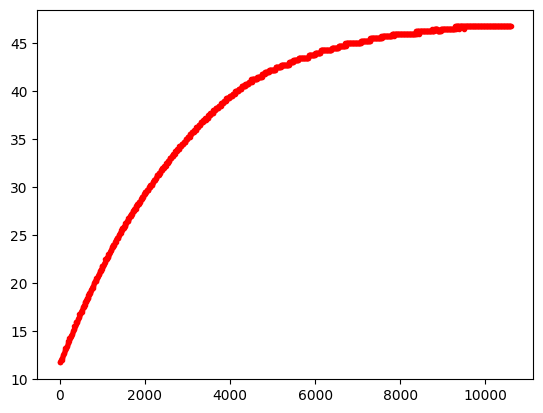

1061


In [4]:
T_1 = [11.75, 11.75, 12.00, 12.00, 12.00, 12.25, 12.25, 12.50, 12.50, 12.75, 12.75, 13.00, 13.00, 13.25, 13.25, 13.25, 13.50, 13.50, 13.75, 13.75, 14.00, 14.00, 14.25, 14.25, 14.25, 14.50, 14.50, 14.50, 14.75, 14.75, 15.00, 15.00, 15.25, 15.25, 15.50, 15.50, 15.50, 15.75, 16.00, 16.00, 16.00, 16.00, 16.25, 16.25, 16.50, 16.50, 16.75, 16.75, 16.75, 17.00, 17.00, 17.00, 17.25, 17.25, 17.50, 17.50, 17.50, 17.75, 17.75, 18.00, 18.00, 18.00, 18.25, 18.25, 18.50, 18.50, 18.50, 18.75, 18.75, 19.00, 19.00, 19.00, 19.25, 19.25, 19.25, 19.50, 19.50, 19.50, 19.75, 19.75, 20.00, 20.00, 20.25, 20.25, 20.25, 20.25, 20.50, 20.50, 20.50, 20.75, 20.75, 21.00, 21.00, 21.00, 21.25, 21.25, 21.25, 21.50, 21.50, 21.75, 21.75, 21.75, 21.75, 22.00, 22.00, 22.25, 22.25, 22.50, 22.50, 22.50, 22.50, 22.75, 22.75, 22.75, 23.00, 23.00, 23.00, 23.25, 23.25, 23.50, 23.50, 23.50, 23.75, 23.75, 23.75, 24.00, 24.00, 24.00, 24.00, 24.25, 24.25, 24.25, 24.50, 24.50, 24.75, 24.75, 24.75, 24.75, 25.00, 25.00, 25.00, 25.25, 25.25, 25.25, 25.50, 25.50, 25.50, 25.75, 25.75, 25.75, 25.75, 26.00, 26.00, 26.00, 26.25, 26.25, 26.25, 26.50, 26.50, 26.50, 26.50, 26.75, 26.75, 26.75, 27.00, 27.00, 27.00, 27.00, 27.25, 27.25, 27.25, 27.50, 27.50, 27.50, 27.50, 27.75, 27.75, 27.75, 27.75, 28.00, 28.00, 28.00, 28.25, 28.25, 28.25, 28.25, 28.50, 28.50, 28.50, 28.50, 28.75, 28.75, 28.75, 29.00, 29.00, 29.00, 29.00, 29.25, 29.25, 29.25, 29.50, 29.50, 29.50, 29.50, 29.75, 29.75, 29.75, 29.75, 29.75, 30.00, 30.00, 30.00, 30.00, 30.25, 30.25, 30.25, 30.25, 30.25, 30.50, 30.50, 30.50, 30.75, 30.75, 30.75, 30.75, 31.00, 31.00, 31.00, 31.25, 31.25, 31.25, 31.25, 31.25, 31.50, 31.50, 31.50, 31.50, 31.75, 31.75, 31.75, 31.75, 32.00, 32.00, 32.00, 32.00, 32.25, 32.25, 32.25, 32.25, 32.25, 32.50, 32.50, 32.50, 32.50, 32.75, 32.75, 32.75, 32.75, 33.00, 33.00, 33.00, 33.00, 33.00, 33.25, 33.25, 33.25, 33.25, 33.50, 33.50, 33.50, 33.50, 33.75, 33.75, 33.75, 33.75, 33.75, 34.00, 34.00, 34.00, 34.00, 34.00, 34.25, 34.25, 34.25, 34.25, 34.25, 34.50, 34.50, 34.50, 34.50, 34.50, 34.75, 34.75, 34.75, 34.75, 34.75, 35.00, 35.00, 35.00, 35.00, 35.25, 35.25, 35.25, 35.25, 35.25, 35.25, 35.50, 35.50, 35.50, 35.50, 35.75, 35.75, 35.75, 35.75, 35.75, 35.75, 36.00, 36.00, 36.00, 36.00, 36.00, 36.25, 36.25, 36.25, 36.25, 36.25, 36.50, 36.50, 36.50, 36.50, 36.50, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 37.00, 37.00, 37.00, 37.00, 37.00, 37.25, 37.00, 37.25, 37.25, 37.25, 37.25, 37.25, 37.50, 37.50, 37.50, 37.50, 37.50, 37.75, 37.75, 37.75, 37.75, 37.75, 37.75, 37.75, 38.00, 38.00, 38.00, 38.00, 38.00, 38.25, 38.25, 38.25, 38.25, 38.25, 38.25, 38.25, 38.50, 38.50, 38.50, 38.50, 38.50, 38.50, 38.75, 38.75, 38.75, 38.75, 38.75, 38.75, 39.00, 39.00, 39.00, 39.00, 39.00, 39.00, 39.25, 39.25, 39.25, 39.25, 39.25, 39.25, 39.25, 39.25, 39.50, 39.50, 39.50, 39.50, 39.50, 39.50, 39.50, 39.75, 39.75, 39.75, 39.75, 39.75, 39.75, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.25, 41.00, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 44.00, 44.00, 44.00, 44.00, 44.00, 44.00, 44.00, 44.00, 44.00, 44.00, 44.00, 44.00, 44.00, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.25, 44.50, 44.50, 44.50, 44.50, 44.50, 44.50, 44.50, 44.50, 44.50, 44.50, 44.50, 44.50, 44.50, 44.50, 44.50, 44.50, 44.75, 44.75, 44.75, 44.75, 44.75, 44.75, 44.75, 44.75, 44.75, 44.75, 44.75, 44.75, 44.75, 44.75, 44.75, 44.75, 45.00, 44.75, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.00, 45.25, 45.00, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.25, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.50, 45.75, 45.50, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 45.75, 46.00, 46.00, 46.00, 46.00, 45.75, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.25, 46.00, 46.25, 46.00, 46.25, 46.25, 46.25, 46.25, 46.00, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.50, 46.25, 46.25, 46.25, 46.25, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.25, 46.50, 46.25, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.50, 46.75, 46.50, 46.75, 46.50, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.50, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.50, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75, 46.75]
t_1 = np.arange(0,10*len(T_1),10)
print(len(T_1))
plt.plot(t_1, T_1,"r.")
plt.show()
print(len(T_1))

In [30]:
Ta1=11.00 #C°
Variacion_t = uc.ufloat(299.54,0.05)
Variacion_T = uc.ufloat(3,0.01)
Masa_agua = uc.ufloat(535,1)
Ce_agua = 4.182
V_foco = uc.ufloat(15.5,0.05)
I_foco = uc.ufloat(1.97,0.005)
P_foco = V_foco*I_foco
beta = (Variacion_T*Masa_agua*Ce_agua)/(P_foco*Variacion_t)
print(beta)
def diferencialT1(t, k):
    return unumpy.nominal_values((beta*P_foco)/(k*Masa_agua*Ce_agua)*(1-np.exp(-k*t))+Ta1)
popt1, pcov1 = curve_fit(diferencialT1, t_1, T_1,bounds=[0,1])
print(popt1)
print(pcov1)
k1 = uc.ufloat(popt1[0],np.sqrt(pcov1[0][0]))
print(k1)
T_eq1 = (beta*P_foco)/(k1*Masa_agua*Ce_agua)+Ta1
print(T_eq1)
print(P_foco)

0.734+/-0.004
[0.00024136]
[[6.30887075e-13]]
0.0002414+/-0.0000008
52.50+/-0.19
30.54+/-0.13


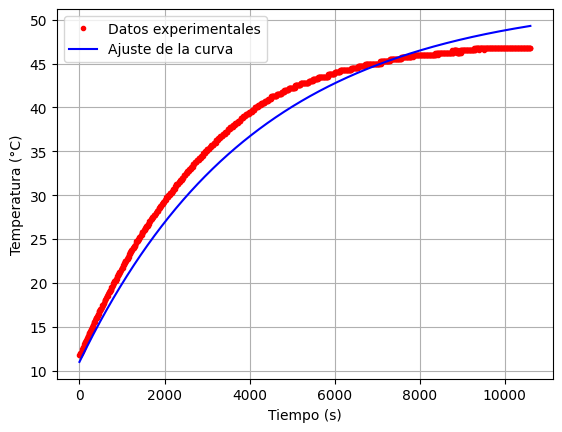

In [6]:
plt.plot(t_1, T_1, "r.", label="Datos experimentales")
plt.plot(t_1, diferencialT1(t_1 , *popt1), 'b-', label="Ajuste de la curva")
plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura (°C)")
plt.grid()
plt.legend()
plt.show()

In [7]:
popt1

array([0.00024136])

In [8]:

N = len(T_1)
T0 = unumpy.nominal_values(T_1[0])
def f(T, t, k):
    dTdt = -k*(unumpy.nominal_values(T) - (0*t+Ta1)) + unumpy.nominal_values((P_foco*beta)/(Masa_agua*Ce_agua))
    return (dTdt)

def curve(t, k):
    t_span = (t[0], t[-1])
    sol = solve_ivp(f, t_span, [T0], t_eval=t, args=(k,))
    return sol.y[0]

p0 = 0.002

popt, pcov = curve_fit(curve , t_1 , T_1 , p0=(p0))
print(popt)


[1.37828062e-06]


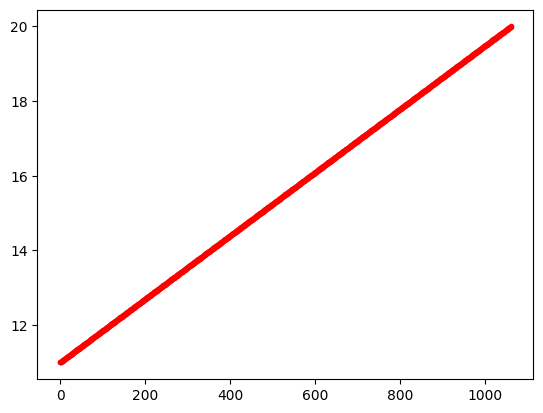

In [9]:
plt.plot([9/10600*t+Ta1 for t in t_1],"r.")

In [10]:
t_1

array([    0,    10,    20, ..., 10580, 10590, 10600])

In [11]:
Ta2=15.50 #C°
Variacion_t2 = uc.ufloat(396.04,0.05)
Variacion_T2 = uc.ufloat(3,0.01)
Masa_agua2 = uc.ufloat(518,1)
Ce_agua = 4.182
V_foco2 = uc.ufloat(12.00,0.05)
I_foco2 = uc.ufloat(1.67,0.005)
P_foco2 = V_foco2*I_foco2
beta2 = (Variacion_T2*Masa_agua2*Ce_agua)/(P_foco2*Variacion_t2)
print(beta2)
print(P_foco2)

0.819+/-0.005
20.04+/-0.10


In [12]:
T_2cortado1=np.array([15.75, 15.75, 15.75, 15.75, 15.75, 16.00, 16.00, 16.00, 16.25, 16.25, 16.25, 16.50, 16.50, 16.50, 16.75, 16.75, 16.75, 17.00, 17.00, 17.25, 17.25, 17.25, 17.50, 17.50, 17.50, 17.75, 17.75, 17.75, 18.00, 18.00, 18.00, 18.00, 18.25, 18.25, 18.50, 18.50, 18.50, 18.50, 18.75, 18.75, 18.75, 18.75, 19.00, 19.00, 19.25, 19.25, 19.25, 19.50, 19.50, 19.50, 19.50, 19.75, 19.75, 19.75, 20.00, 20.00, 20.00, 20.25, 20.25, 20.25, 20.25, 20.50, 20.50, 20.50, 20.75, 20.75, 20.75, 20.75, 21.00, 21.00, 21.00, 21.25, 21.25, 21.25, 21.50, 21.50, 21.50, 21.75, 21.75, 21.75, 21.75, 22.00, 22.00, 22.00, 22.00, 22.25, 22.25, 22.25, 22.25, 22.50, 22.50, 22.50, 22.75, 22.75, 22.75, 22.75, 23.00, 23.00, 23.00, 23.00, 23.25, 23.25, 23.25, 23.25, 23.25, 23.50, 23.50, 23.50, 23.50, 23.75, 23.75, 23.75, 24.00, 24.00, 24.00, 24.00, 24.25, 24.25, 24.25, 24.25, 24.50, 24.50, 24.50, 24.50, 24.50, 24.75, 24.75, 24.75, 25.00, 25.00, 25.00, 25.00, 25.25, 25.25, 25.25, 25.25, 25.25, 25.50, 25.50, 25.50, 25.75, 25.75, 25.75, 25.75, 25.75, 26.00, 26.00, 26.00, 26.00, 26.00, 26.25, 26.25, 26.25, 26.25, 26.25, 26.50, 26.50, 26.50, 26.50, 26.75, 26.75, 26.75, 26.75, 27.00, 27.00, 27.00, 27.00, 27.00, 27.25, 27.25, 27.25, 27.25, 27.50, 27.50, 27.50, 27.50, 27.50, 27.75, 27.75, 27.75, 27.75, 28.00, 28.00, 28.00, 28.00, 28.00, 28.00, 28.25, 28.25, 28.25, 28.25, 28.25, 28.50, 28.50, 28.50, 28.50, 28.50, 28.75, 28.75, 28.75, 28.75, 29.00, 29.00, 29.00, 29.00, 29.00, 29.25, 29.25, 29.25, 29.25, 29.25, 29.25, 29.50, 29.50, 29.50, 29.50, 29.50, 29.75, 29.75, 29.75, 29.75, 29.75, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.25, 30.25, 30.25, 30.25, 30.25, 30.25, 30.50, 30.50, 30.50, 30.50, 30.50, 30.50, 30.75, 30.75, 30.75, 30.75, 30.75, 31.00, 31.00, 31.00, 31.00, 31.00, 31.00, 31.25, 31.25, 31.25, 31.25, 31.25, 31.25, 31.25, 31.50, 31.50, 31.50, 31.50, 31.50, 31.75, 31.75, 31.75, 31.75, 31.75, 31.75, 32.00, 32.00, 32.00, 32.00, 32.00, 32.00, 32.25, 32.25, 32.25, 32.25, 32.25, 32.25, 32.25, 32.50, 32.50])
T_2cortado2=np.array([38.50, 38.50, 38.50, 38.75, 38.75, 38.75, 38.75, 38.75, 38.75, 38.75, 38.75, 38.75, 38.75, 38.75, 38.75, 38.75, 39.00, 39.00, 39.00, 39.00, 39.00, 39.00, 39.00, 39.00, 39.00, 39.00, 39.00, 39.00, 39.00, 39.00, 39.00, 39.25, 39.25, 39.25, 39.25, 39.25, 39.25, 39.25, 39.25, 39.25, 39.25, 39.25, 39.25, 39.25, 39.25, 39.50, 39.50, 39.50, 39.50, 39.50, 39.50, 39.50, 39.50, 39.50, 39.50, 39.50, 39.50, 39.50, 39.50, 39.50, 39.75, 39.75, 39.75, 39.75, 39.75, 39.75, 39.75, 39.75, 39.75, 39.75, 39.75, 39.75, 40.00, 39.75, 40.00, 39.75, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.00, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.25, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.50, 40.75, 40.50, 40.75, 40.75, 40.50, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 40.75, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.00, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.25, 41.50, 41.25, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.50, 41.75, 41.50, 41.50, 41.50, 41.50, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 41.75, 42.00, 41.75, 42.00, 41.75, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.25, 42.50, 42.25, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.50, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 42.75, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.00, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.50, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.25, 43.50, 43.25, 43.25, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.50, 43.75, 43.75, 43.50, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75, 43.75])
#t_2cortado1= np.arange(0,10*len(T_2cortado1),10)
ultimo=2830
#t_2cortado2 = np.arange(3000, 3000 + 10 * len(T_2cortado2), 10)

#plt.plot(t_2 , T_2 , "r.")
#plt.plot(t_2cortado2,T_2cortado2,"r.")

In [22]:

def diferencialT2(t, k):
    return unumpy.nominal_values((beta2*P_foco2)/(k*Masa_agua2*Ce_agua)*(1-np.exp(-k*t))+Ta2)
popt2, pcov2 = curve_fit(diferencialT2, t_2, T_2,bounds=[0,1])
print(popt2)
print(pcov2)
T_eq2 = (beta2*P_foco2)/(k2*Masa_agua2*Ce_agua)+Ta2
print(T_eq2)

[0.00024044]
[[2.02374239e-13]]
47.01+/-0.11


In [ ]:
plt.plot(t_2cortado1, T_2cortado1,"r.")
plt.plot(t_2cortado1, diferencialT2(t_2cortado1 , *popt2), 'b-')
plt.grid()
plt.show()

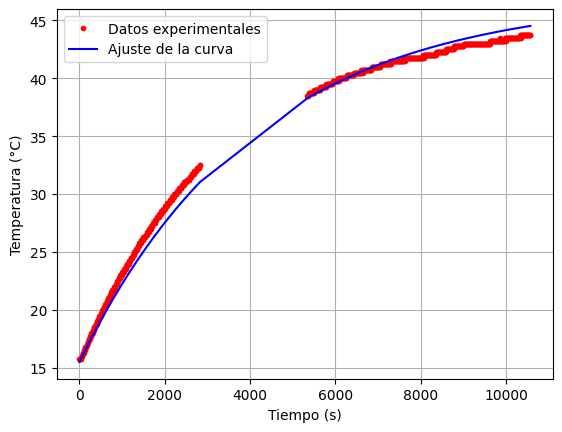

0.0002404+/-0.0000004


In [29]:
ceros = np.zeros(200)
T_2 = np.concatenate((T_2cortado1, T_2cortado2))
t_2cortado1 = np.arange(0, 10 * len(T_2cortado1), 10)
t_2cortado2 = np.arange(5340, 5340 + 10 * len(T_2cortado2), 10)
t_2 = np.concatenate((t_2cortado1, t_2cortado2))
plt.plot(t_2, T_2, "r.", label="Datos experimentales")
plt.plot(t_2, diferencialT2(t_2 , *popt2), 'b-', label="Ajuste de la curva")
plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura (°C)")
plt.grid()
plt.legend()
plt.show()
k2 = uc.ufloat(popt2[0],np.sqrt(pcov2[0][0]))
print(k2)

In [ ]:
print(len(T_2cortado1))